<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Transient multi-layer analytic element modeling with TTim
*Mark Bakker*

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from ttim import *

### Exercise 1

Consider a well pumping in a confined aquifer. The hydraulic conductivity of the aquifer is 10 m/d and the thickness is 20 m. The well pumps with a discharge of 1000 m$^3$/d for 50 days and is then turned off. Compute the head at a distance of 20 m from the well for the first 100 days after the well starts pumping. Plot the head vs. time in one graph for three values of the specific storage: $S_s=0.01, 0.001, 0.0001$ m$^{-1}$. Can you explain why the head does not seem to be a function of $S_s$ after the well is turned off? 

In [2]:
S = [0.01, 0.001, 0.0001]*20
H = np.zeros((len(S), 100))
t = np.logspace(-2,2,100)
for i in range(len(S)):
    ml_1 = ModelMaq(kaq= 10, z = [0, -20], Saq = S[i], tmin= 0.001, tmax = 1000)
    w = Well(ml_1, xw=0, yw=0, tsandQ= [(0,1000),(50,0)])
    ml_1.solve(silent=True)
    H[i][:] = ml_1.head(20,0,t)

<IPython.core.display.Javascript object>


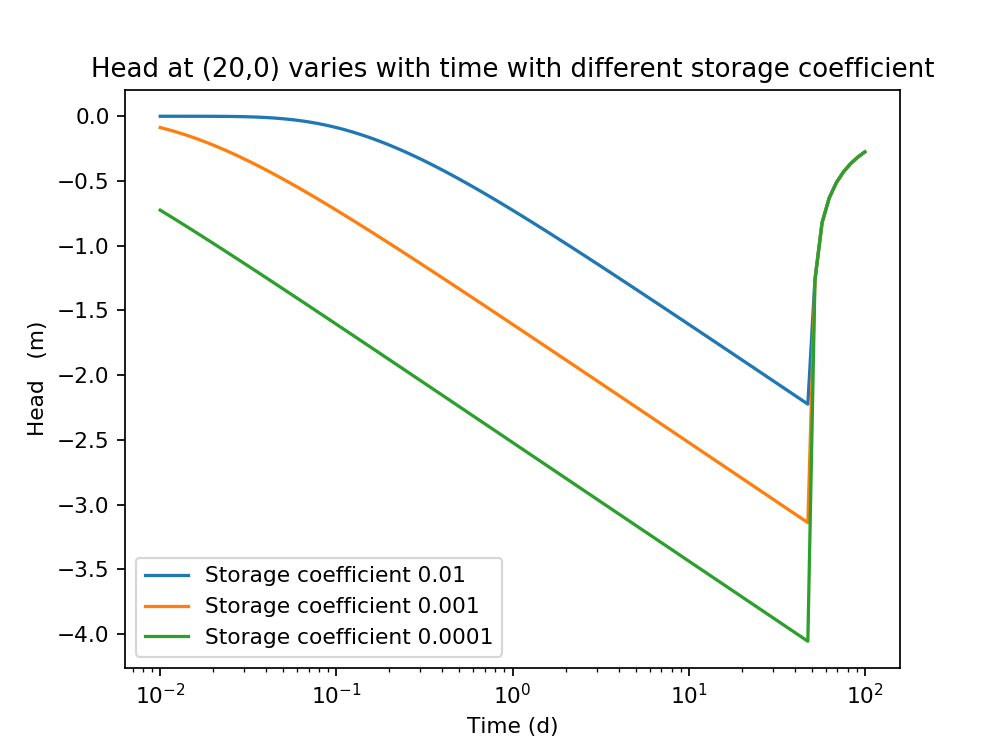

Text(0,0.5,'Head   (m)')

In [3]:
plt.figure()
for i in range(3):
    plt.semilogx(t,H[i][:],label = 'Storage coefficient %s'%(S[i]))
plt.legend()
plt.title('Head at (20,0) varies with time with different storage coefficient')
plt.xlabel('Time (d)')
plt.ylabel('Head   (m)')

Answer:

After it has turned off, the superposistion of discharging well and recharging well cancel out the storage coefficient while only time variable has been retained.

### Exercise 2
Consider a well pumping in a phreatic aquifer. The hydraulic conductivity of the aquifer is 10 m/d and the saturated thickness may be approximated as constant and equal to 20 m. The well is located at $(x,y)=(0,0)$. The discharge of the well is 1000 m$^3$/d. Compute the head at $(x,y)=(20,0)$ for the first 20 days after the well starts pumping. Plot the head vs. time in one graph for three cases:
1. The well is pumping without any other features nearby.
2. A river with a fixed head is located along the line $x=50$ m. 
3. An impermeable rock outcrop runs along the line $x=50$ m.

In [7]:
t = np.linspace(0.001,20,100)
head = np.zeros((3,len(t)))
#Situation 1 
ml_2_1 = ModelMaq(kaq= 5, z = [0,-20], Saq = [0.4], phreatictop=True, tmin= 0.001, tmax= 100 )
w1 = Well(ml_2_1, xw=0, yw=0, tsandQ=[(0,1000)], label='well without features')
ml_2_1.solve(silent=True)
head[0][:] = ml_2_1.head(20,0,t)

#Situation 2
ml_2_2 = ModelMaq(kaq= 5, z = [0,-20], Saq = [0.4], phreatictop=True, tmin= 0.001, tmax= 100 )
w2_1 = Well(ml_2_2, xw=0, yw=0, tsandQ=[(0,1000)], label='discharge well with river')
w2_2 = Well(ml_2_2, xw= 100, yw= 0, tsandQ=[0,-1000], label='recharge well with river')
ml_2_2.solve(silent=True)
head[1][:] = ml_2_2.head(20,0,t)

#Situation 3
ml_2_3 = ModelMaq(kaq= 5, z = [0,-20], Saq = [0.4], phreatictop=True, tmin= 0.001, tmax= 100 )
w3_1 = Well(ml_2_3, xw=0, yw=0, tsandQ=[(0,1000)], label='discharge well 1 with rock outcrop')
w3_2 = Well(ml_2_3, xw= 100, yw= 0, tsandQ=[0,1000], label='discharge well 2 with rock outcrop')
ml_2_3.solve(silent=True)
head[2][:] = ml_2_3.head(20,0,t)



<IPython.core.display.Javascript object>


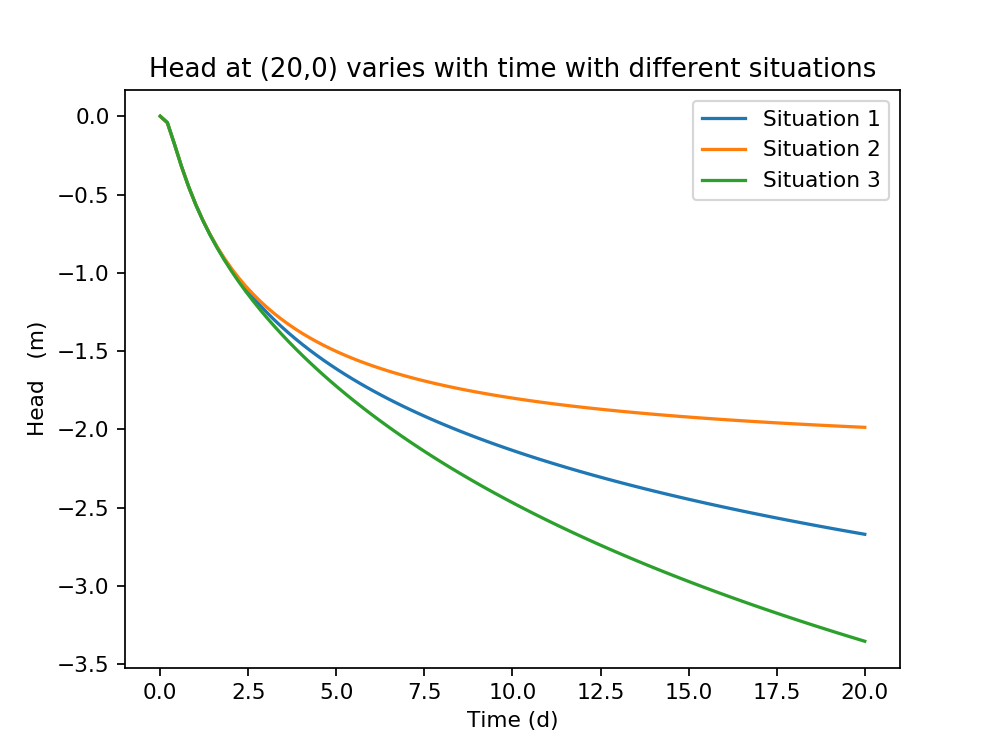

Text(0,0.5,'Head   (m)')

In [8]:
plt.figure()
for i in range(3):
    plt.plot(t,head[i][:], label='Situation '+ str(i+1))
plt.legend()
plt.title('Head at (20,0) varies with time with different situations')
plt.xlabel('Time (d)')
plt.ylabel('Head   (m)')

### Exercise 3
Consider a well pumping in a semi-confined aquifer. The hydraulic conductivity of the aquifer is 10 m/d, the thickness is 20 m, and the specific storage is 0.0001 m$^{-1}$. The leaky layer on top of the aquifer is 2 m thick and has a resistance of $c$. Make three graphs next to each other (use `plt.subplot`). In each graph, plot the head vs. $x$ (from $x=-1500$ to $x=1500$ m) along the line $y=0$ for the case that $c=1000$ d and for the case that $c=\infty$. The three graphs are for $t=0.1$ d, $t=1$ d, and $t=10$ d (from left to right). Note when the head starts to be different for the semi-confined case as compared to the confined case. 

<IPython.core.display.Javascript object>


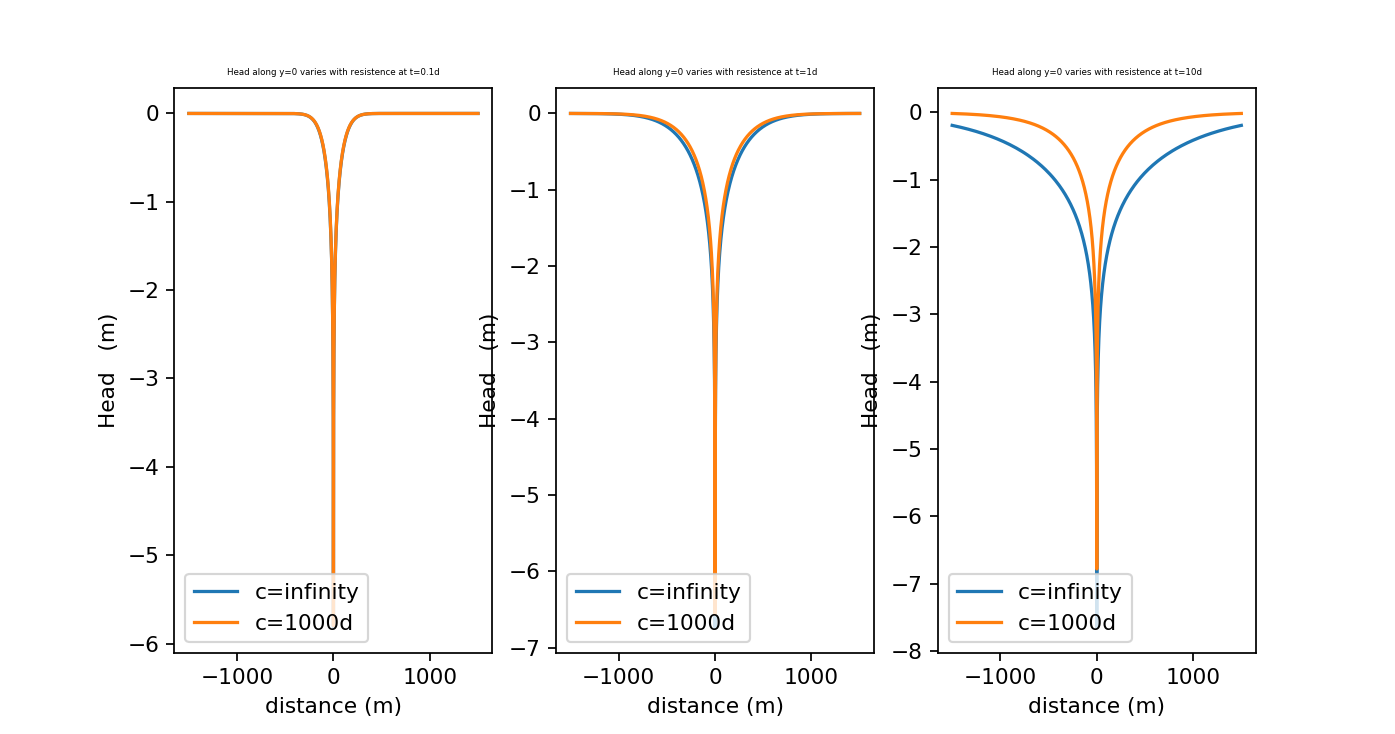

Text(0,0.5,'Head   (m)')

In [7]:
T = [0.1,1,10]
C = [1000, 1e8]
#Model 1 with resistence of 1000d
ml_3_1 = ModelMaq(kaq= 10, z=[2,0,-20], c=1000, Saq= 0.0001, topboundary='semi', tmin=0.001, tmax=100)
w_3_1 = Well(ml_3_1, xw=0, yw=0, tsandQ= [(0, 1000)])
ml_3_1.solve(silent=True)
# Model 2 with resistence of infinity
ml_3_2 = ModelMaq(kaq= 10, z=[2,0,-20], c=1e8, Saq= 0.0001, topboundary='semi', tmin=0.001, tmax=100)
w_3_2 = Well(ml_3_2, xw=0, yw=0, tsandQ= [(0, 1000)])
ml_3_2.solve(silent=True)

X = np.linspace(-1500,1500,3001)
h1 = ml_3_1.headalongline(x=X,y=0,t=T)
h2 = ml_3_2.headalongline(x=X,y=0,t=T)

plt.figure()
plt.subplot(131)
plt.plot(X[:],h2[0][0][:],label='c=infinity')
plt.plot(X[:],h1[0][0][:],label='c='+str(C[0])+'d')
plt.legend()
plt.title('Head along y=0 varies with resistence at t='+str(T[0])+'d', fontsize=4)
plt.xlabel('distance (m)')
plt.ylabel('Head   (m)')
plt.subplot(132)
plt.plot(X[:],h2[0][1][:],label='c=infinity')
plt.plot(X[:],h1[0][1][:],label='c='+str(C[0])+'d')
plt.legend()
plt.title('Head along y=0 varies with resistence at t='+str(T[1])+'d', fontsize=4)
plt.xlabel('distance (m)')
plt.ylabel('Head   (m)')
plt.subplot(133)
plt.plot(X[:],h2[0][2][:],label='c=infinity')
plt.plot(X[:],h1[0][2][:],label='c='+str(C[0])+'d')
plt.legend()
plt.title('Head along y=0 varies with resistence at t='+str(T[2])+'d', fontsize=4)
plt.xlabel('distance (m)')
plt.ylabel('Head   (m)')

### Exercise 4
Consider a well pumping in a confined two-aquifer system. The hydraulic conductivity of the top and bottom aquifers is 10 m/d and 20 m/d, respectively. The specific storage of the top and bottom aquifers is 0.0002 m$^{-1}$ and 0.0001 m$^{-1}$, respectively. The thickness of both aquifers is 20 m. The leaky layer between the two aquifers is 2 m thick and has a resistance $c$. A well starts pumping with a discharge of 1000 m$^3$/d in the top aquifer. Plot the head vs. time at 20 m from the well for the first 20 d after the well starts pumping. In one graph, plot the head in both aquifers for the case that $c=1000$ d and for the case that the leaky layer is approximated as impermeable.

<IPython.core.display.Javascript object>


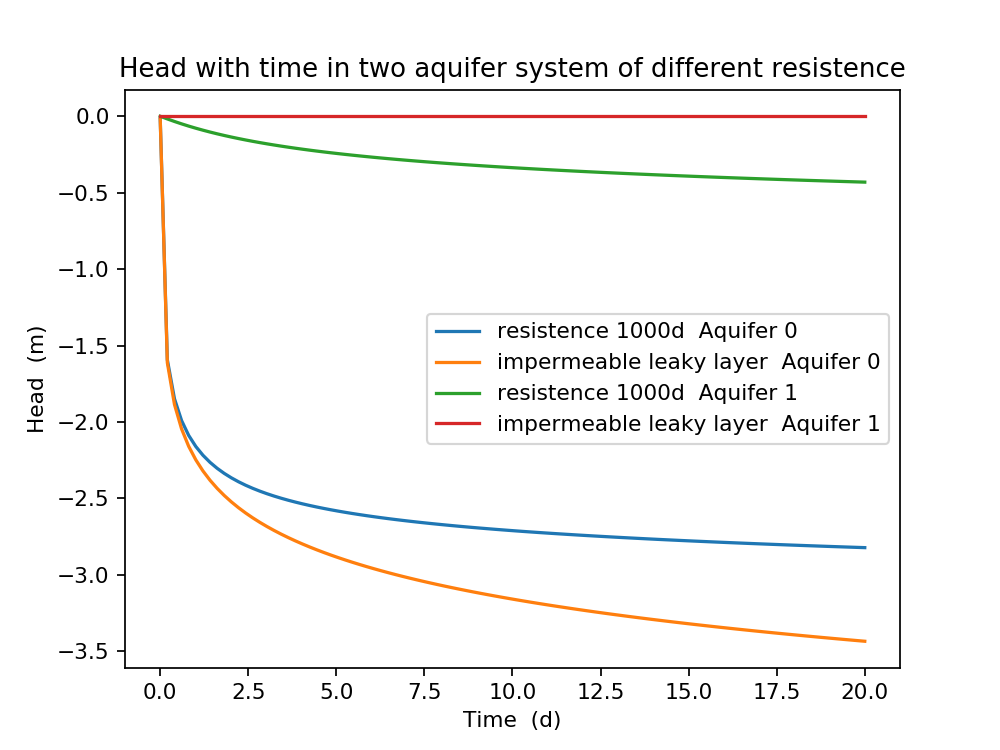

Text(0,0.5,'Head  (m)')

In [8]:
T = np.linspace(0.001,20,100)
ml_4_1 = ModelMaq(kaq=[10,20], z=[0,-20,-22,-42],c=1000, Saq=[0.0002,0.0001],tmin=0.001, tmax=100)
w1_4 = Well(ml_4_1, tsandQ=[(0,1000)],layers = 0)
ml_4_1.solve(silent=True)
h1 = ml_4_1.head(x=20,y=0,t=T)

ml_4_2 = ModelMaq(kaq=[10,20], z=[0,-20,-22,-42],c=1e8, Saq=[0.0002,0.0001],tmin=0.001, tmax=100)
w2_4 = Well(ml_4_2, tsandQ=[(0,1000)],layers = 0)
ml_4_2.solve(silent=True)
h2 = ml_4_2.head(x=20,y=0,t=T)

plt.figure()
for i in range(2):
    plt.plot(T,h1[i][:], label='resistence 1000d  ' +'Aquifer '+str(i))
    plt.plot(T,h2[i][:], label='impermeable leaky layer  '+ 'Aquifer '+str(i))
plt.legend()
plt.title('Head with time in two aquifer system of different resistence')
plt.xlabel('Time  (d)')
plt.ylabel('Head  (m)')

### Exercise 5
Consider two 200 m long and parallel canals of a managed aquifer recharge system. The two canals run North-South and are 100 m apart. End points of the Western canal are $(-50, -100)$ and $(-50, 100)$. Initially, the water level in both canals is the same and equal to $h=0$. At time $t=0$, the head in the left canal is raised to $h=1$ m, at $t=20$ d it is raised to $h=1.5$ m and at $t=40$ d is it lowered back to $h=0$. Plot the head vs. $x$ along the line $y=0$ for $x$ going from -200 to +200 m for $t=20$, $t=40$, and $t=60$ d all  in one grpah. In a second graph, make a contour plot showing the head in the aquifer and both canals at time $t=20$ d. 

In [1]:
ml_5 = ModelMaq(kaq=10, z=[0,-20], tmin=0.001, tmax = 100)
ls_5_1 = HeadLineSinkString(ml_5, xy=[(-50,-100),(-50,100)], tsandh=[(0,1),(20,1.5),(40,0)])
ls_5_2 = HeadLineSinkString(ml_5, xy=[(50,-100),(50,100)], tsandh='fixed')
ml_5.solve()
T = [20,40,60]
X = np.linspace(-200,200,401)
H = ml_5.headalongline(x=X, y=0, t= T)
#First graph
plt.figure()
for i in range(3):
    plt.plot(X, H[0][i][:], label='t='+str(T[i])+'d')
plt.legend()
plt.title('Head with space at different time of two line sink model')
plt.xlabel('Distance   (m)')
plt.ylabel('Head       (m)')

#Second graph
ml_5.contour(win=[-100,100,-150,150],t=20, labels=True,decimals=2,levels=10)
plt.title('Contour plot of two line sink model at t=20d')
plt.xlabel('Distance   (m)')
plt.ylabel('Distance   (m)')

NameError: name 'ModelMaq' is not defined


### Exercise 6
Consider the measured head and time of a 24 hour pumping test as stored in `pumpingtestdata.txt`. The well starts pumping at time $t=0$ with a discharge $Q=800$ m$^3$/d. The head is measured in an observation well 10 m from the pumping well. The thickness of the aquifer is 20 m. Questions:

1. Determine the optimal values of the hydraulic conductivity and specific storage coefficient of the aquifer when the aquifer is approximated as confined. Use a least squares approach and make use of the `fmin` function of `scipy.optimize` to find the optimal values. Plot the data with dots and the best-fit model in one graph. Print the optimal values of $k$ and $S_s$ to the 
screen as well as the root mean squared error of the residuals. 

2. Repeat Question 1 but now approximate the aquifer as semi-confined. Plot the data with dots and the best-fit model in one graph. Print to the screen the optimal values of $k$, $S_s$ and $c$  to the screen as well as the root mean squared error of the residuals. Is the semi-cofined model a better fit than the confined model?

Two aquifers:
1. k=10 Ss=2*10-4
2. c=1000
3. k=20 Ss=1*10-4

In [2]:
from scipy.optimize import fmin
data = np.loadtxt('pumpingtestdata.txt')
time_data = data[:,0]
head_data = data[:,1]
def model_confined(k,S,t):
    ml_6 = ModelMaq(kaq=k, z=[0,-20], tmin=0.01, tmax = 100, Saq = S)
    w_6 = Well(ml_6, xw=0, yw=0, tsandQ=[(0,800)])
    ml_6.solve(silent=True)
    return ml_6.head(10,0,t)

def obj(P,t,obs):
    return ((model_confined(P[0],P[1],t) - obs)**2).sum()

k,S = fmin(obj,x0=[10,0.001], args=(time_data,head_data))
print('The optimal hydraulic conductivity and storage coefficient are %.2f m/d and %.5f respectively'%(k,S))
print('The root mean square error is %.3f'%(np.sqrt(obj([k,S],time_data,head_data)/len(head_data))))

Optimization terminated successfully.
         Current function value: 0.229258
         Iterations: 50
         Function evaluations: 105
The optimal hydraulic conductivity and storage coefficient are 11.48 m/d and 0.00012 respectively
The root mean square error is 0.048


<IPython.core.display.Javascript object>


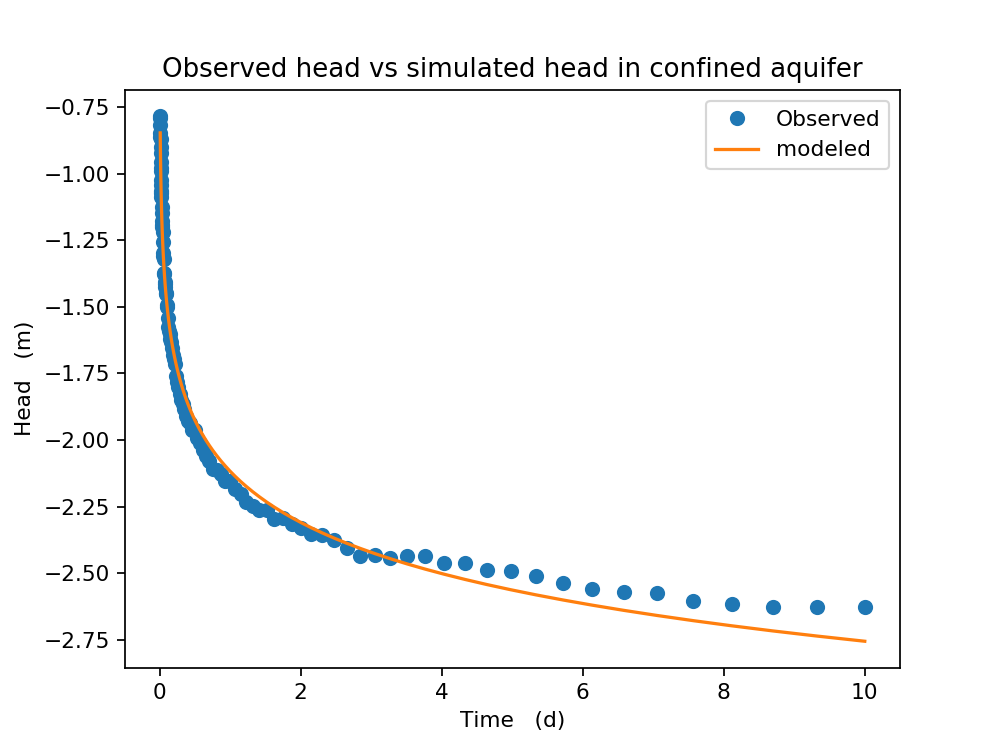

Text(0.5,1,'Observed head vs simulated head in confined aquifer')

In [11]:
ml = model_confined(k,S,time_data)
plt.figure()
plt.plot(time_data, head_data,'o', label='Observed')
plt.plot(time_data, ml[0], label ='modeled')
plt.legend()
plt.xlabel('Time   (d)')
plt.ylabel('Head   (m)')
plt.title('Observed head vs simulated head in confined aquifer')


In [12]:
def model_semiconfined(k,S,c,t):
    ml_6 = ModelMaq(kaq=k, z=[2,0,-20],c=c, topboundary='semi', tmin=0.01, tmax = 100, Saq = S)
    w_6 = Well(ml_6, xw=0, yw=0, tsandQ=[(0,800)])
    ml_6.solve(silent=True)
    return ml_6.head(10,0,t)

def obj(P,t,obs):
    return ((model_semiconfined(P[0],P[1],P[2], t) - obs)**2).sum()

k,S,c = fmin(obj,x0=[10,0.1,1000], args=(time_data,head_data))

print('The optimal hydraulic conductivity , storage coefficient and resistence are %.2f m/d and %.5f %s days respectively'%(k,S,c))
print('The root mean square error is %.3f'%(np.sqrt(obj([k,S,c],time_data,head_data)/len(head_data))))

Optimization terminated successfully.
         Current function value: 0.023123
         Iterations: 107
         Function evaluations: 204
The optimal hydraulic conductivity , storage coefficient and resistence are 10.20 m/d and 0.00019 1795.96638892 days respectively
The root mean square error is 0.015


<IPython.core.display.Javascript object>


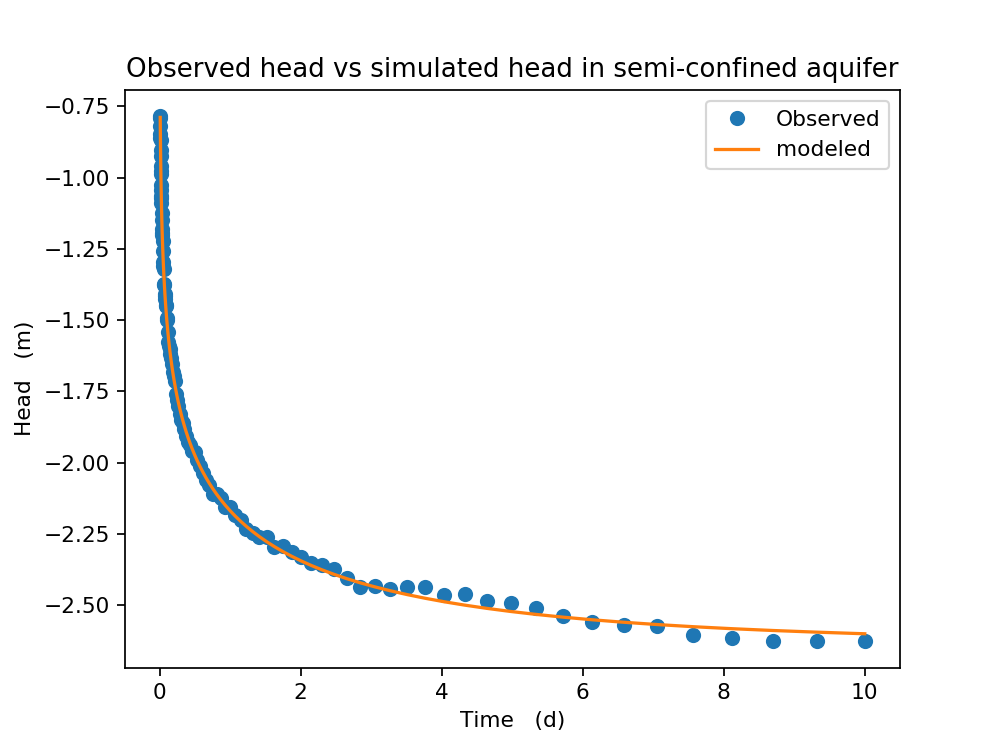

Text(0.5,1,'Observed head vs simulated head in semi-confined aquifer')

In [13]:
ml = model_semiconfined(k,S,c, time_data)
plt.figure()
plt.plot(time_data, head_data,'o', label='Observed')
plt.plot(time_data, ml[0], label ='modeled')
plt.legend()
plt.xlabel('Time   (d)')
plt.ylabel('Head   (m)')
plt.title('Observed head vs simulated head in semi-confined aquifer')

**Conclusion**

From fitted curve of two systems, semi-confined aquifer has smaller root mean square error, which proves that semi-confined aquifer gives a better simulation of testing data